                       City  Population  Propertycrime  Murder_raw  \
0             Adams Village      1861.0           12.0         0.0   
1  Addison Town and Village      2577.0           24.0         0.0   
2             Akron Village      2846.0           16.0         0.0   
3                    Albany     97956.0         4090.0         8.0   
4            Albion Village      6388.0          223.0         0.0   

   Robbery_raw  
0          0.0  
1          0.0  
2          0.0  
3        227.0  
4          4.0  
City              object
Population       float64
Propertycrime    float64
Murder_raw       float64
Robbery_raw      float64
dtype: object


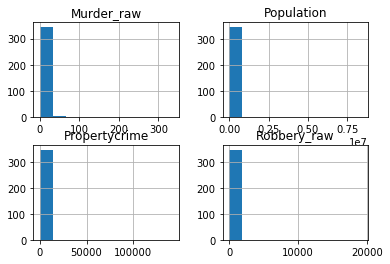

In [6]:
# Solution:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

crime=pd.read_csv('C:/Users/Bethany/Documents/Home/Thinkful/nyc_crime_2013.csv')
# Keeping only relevant variables
crime = crime[['City','Population','Property\ncrime','Murder and\nnonnegligent\nmanslaughter','Robbery']]
#Renaming variables
crime.columns=['City','Population','Propertycrime','Murder_raw','Robbery_raw']
print(crime.head())
print(crime.dtypes)
crime.hist()
plt.show()

         City  Population  Propertycrime  Murder_raw  Robbery_raw
216  New York   8396126.0       141971.0       335.0      19170.0


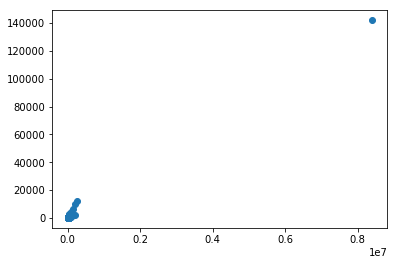

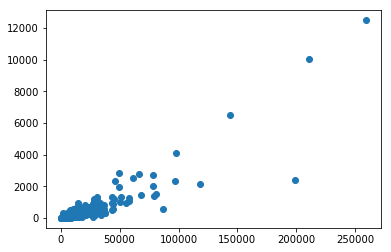

In [7]:
# Looking for identity of the anomalous case

print(crime.loc[crime['Population']==max(crime['Population']),:])
# Oh look, it's NYC.  Let's see if the relationship between population and crime is different for NYC:

plt.scatter(crime['Population'],crime['Propertycrime'])
plt.show()

# Looks like the values are just super-high because NYC is super-large, not because crime and population
# are related differently for NYC.
# We could take the log of the scores to pull in the outlier, but that makes interpretation annoying.
# Let's just drop NYC for now and see what happens
crime_noNYC=crime.loc[crime['City']!="New York",:]

plt.scatter(crime_noNYC['Population'],crime_noNYC['Propertycrime'])
plt.show()


In [8]:
# Alright, that's better.  Now the binary variables
crime['Robbery']=np.where(crime['Robbery_raw']>0,1,0)
crime['Murder']=np.where(crime['Murder_raw']>0,1,0)

# Finally, the squared pop variable.  
crime['Pop_sq']=crime['Population']*crime['Population']

print(crime.head())

                       City  Population  Propertycrime  Murder_raw  \
0             Adams Village      1861.0           12.0         0.0   
1  Addison Town and Village      2577.0           24.0         0.0   
2             Akron Village      2846.0           16.0         0.0   
3                    Albany     97956.0         4090.0         8.0   
4            Albion Village      6388.0          223.0         0.0   

   Robbery_raw  Robbery  Murder        Pop_sq  
0          0.0        0       0  3.463321e+06  
1          0.0        0       0  6.640929e+06  
2          0.0        0       0  8.099716e+06  
3        227.0        1       1  9.595378e+09  
4          4.0        1       0  4.080654e+07  
